In [1]:
#Install gdown library 
!pip install gdown


[notice] A new release of pip is available: 24.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Download file in Jupyter notebook
import gdown

file_id = "1Ck__0Xxj5kQKQVSg4li0yi61pMr3O2S_"
url = f"https://drive.google.com/uc?id={file_id}"

output = 'churn_clean_pres.csv'  # Specify your desired output file name
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Ck__0Xxj5kQKQVSg4li0yi61pMr3O2S_
To: /Users/jasminemoniquecooper/churn_clean_pres.csv
100%|██████████████████████████████████████| 3.57M/3.57M [00:00<00:00, 23.7MB/s]


'churn_clean_pres.csv'

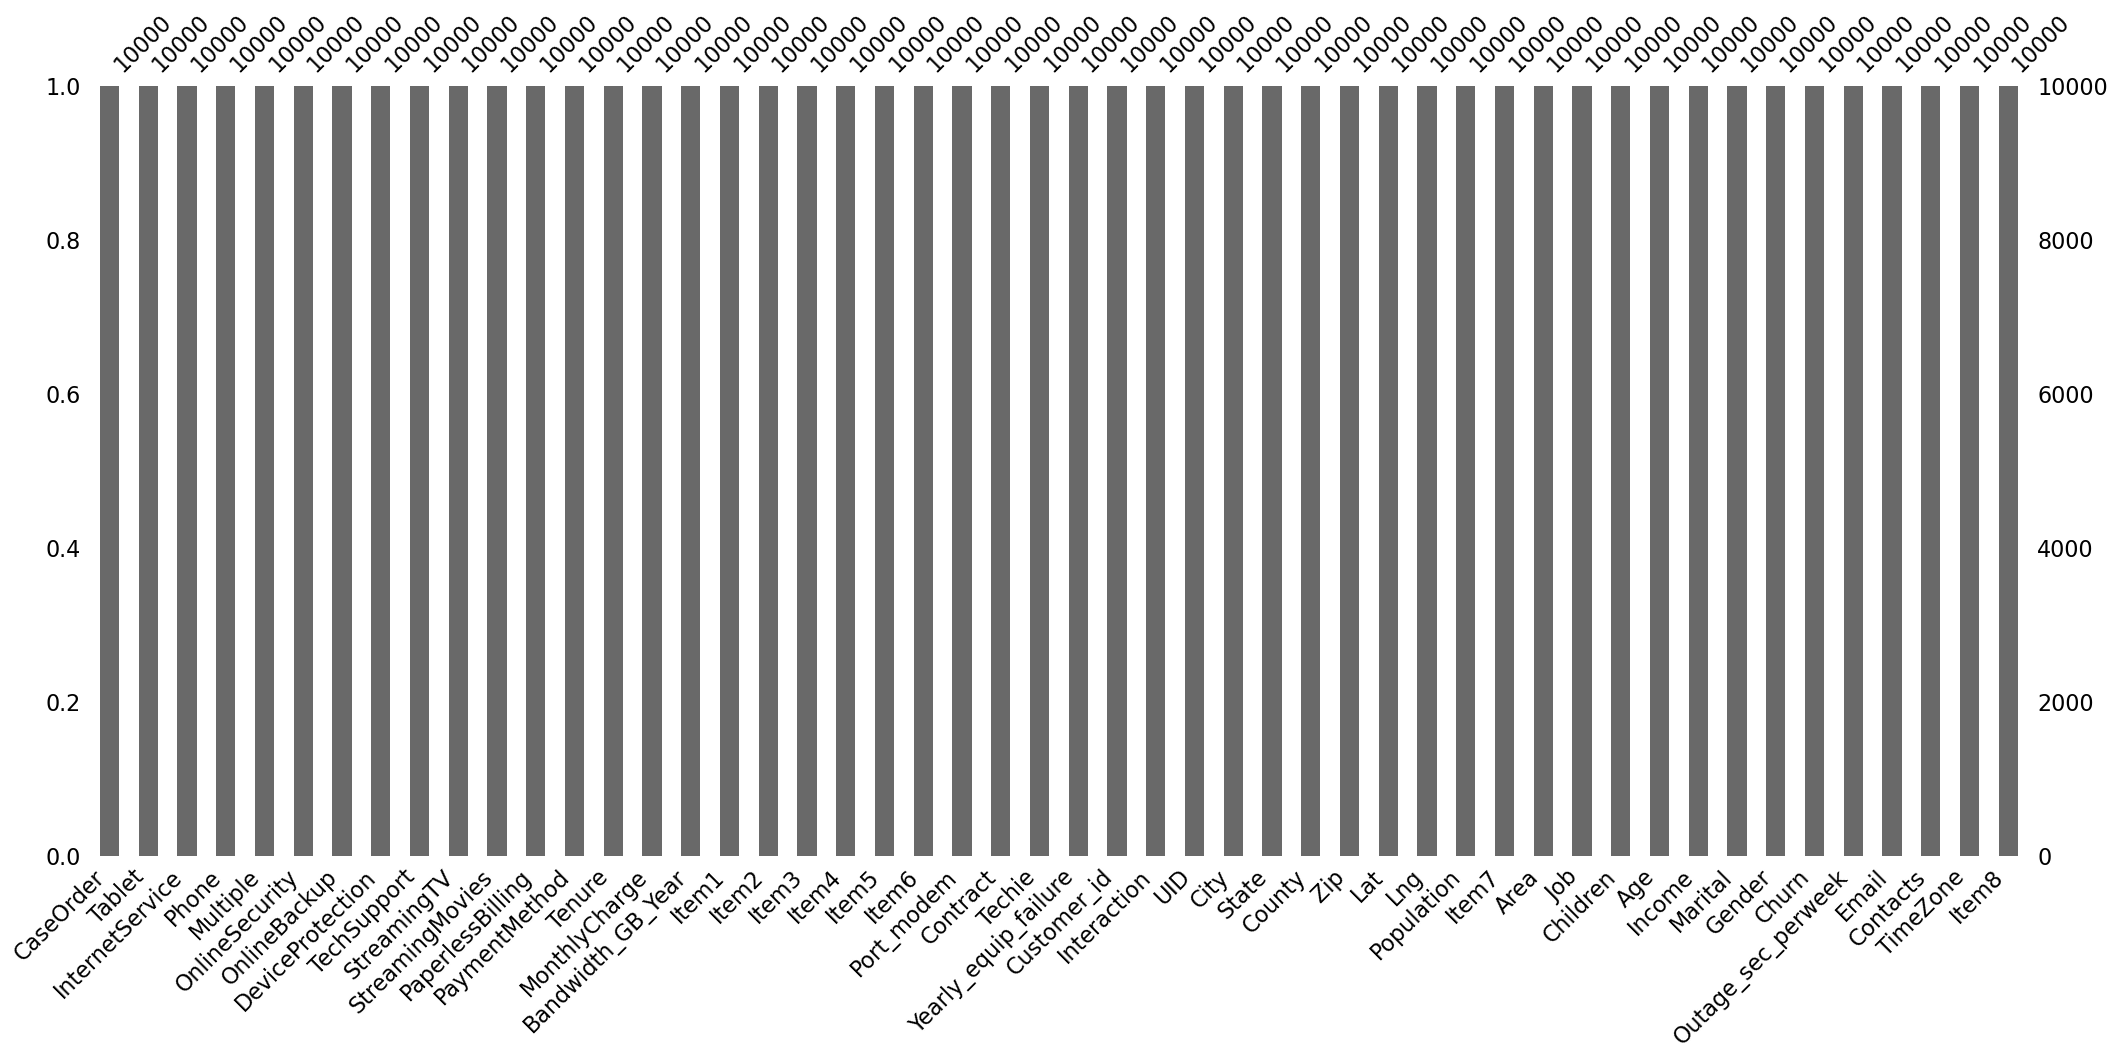

In [3]:
import pandas as pd 
import missingno as msno
import matplotlib.pyplot as plt
churn_clean_data = pd.read_csv (output)
pd.set_option('display.max_columns', None)
churn_clean_data.head(10)

#ensure no missing data
column_order = churn_clean_data.isnull().sum().sort_values().index
msno.bar(churn_clean_data[column_order])
plt.show()

In [4]:
#reducing the dataset to only include neccessary variables 

selected_columns = ['Income', 'Email', 'Tenure']

churn_clean_kmeans = churn_clean_data[selected_columns]

print(churn_clean_kmeans)

        Income  Email     Tenure
0     28561.99     10   6.795513
1     21704.77     12   1.156681
2      9609.57      9  15.754144
3     18925.23     15  17.087227
4     40074.19     16   1.670972
...        ...    ...        ...
9995  55723.74     12  68.197130
9996  34129.34     15  61.040370
9997  45983.43     10  47.416890
9998  16667.58     14  71.095600
9999   9020.92     17  63.350860

[10000 rows x 3 columns]


In [5]:
#standardize the features

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_churn_data = scaler.fit_transform(churn_clean_kmeans)
print(scaled_churn_data)

[[-0.39877774 -0.66628178 -1.04874621]
 [-0.64195445 -0.00528795 -1.26200116]
 [-1.07088496 -0.9967787  -0.7099398 ]
 ...
 [ 0.21903654 -0.66628178  0.48751337]
 [-0.82058767  0.65570588  1.38301834]
 [-1.09176018  1.64719663  1.09012007]]


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly t

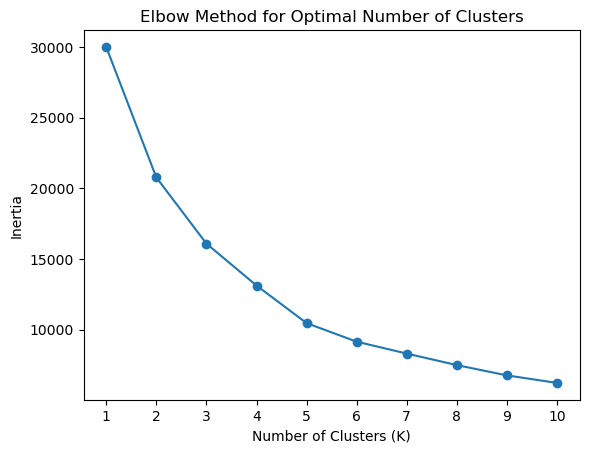

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Fit KMeans with a range of K values
inertia_values = []
k_values = range(1, 11)  # Try different numbers of clusters from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_churn_data)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.show()


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Inertia: 10469.409804065224
Silhouette Score: 0.316449874702952


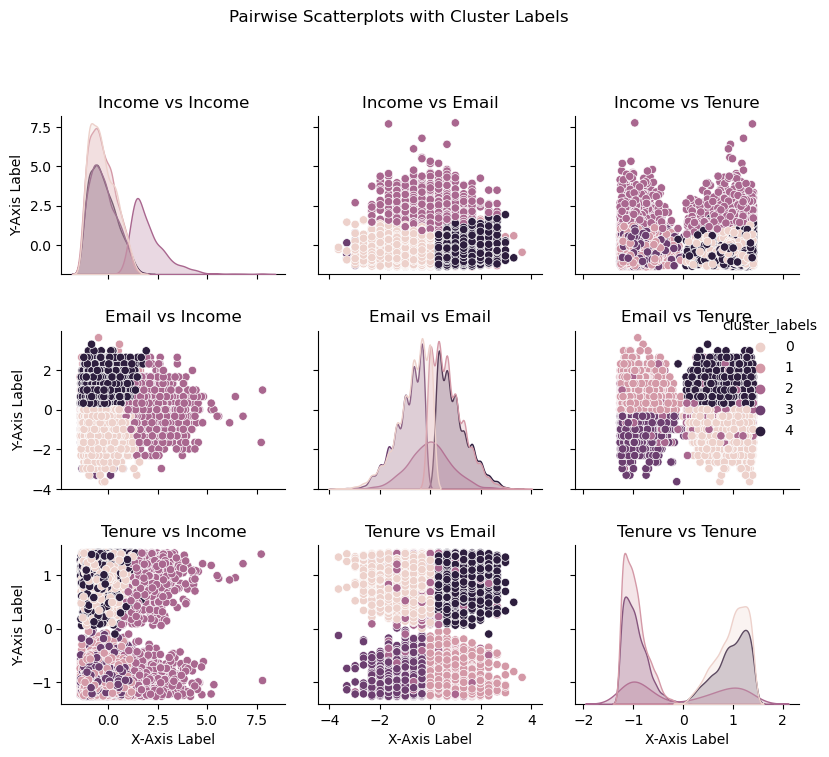

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the random seed
np.random.seed(21)

# Convert scaled_churn_data to DataFrame with index
scaled_churn_data_df = pd.DataFrame(scaled_churn_data, index=range(len(scaled_churn_data)))

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_churn_data_df)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Generate cluster labels
cluster_labels = kmeans.predict(scaled_churn_data_df)

# Calculate inertia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_churn_data_df, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Convert cluster_labels array to DataFrame
cluster_labels_df = pd.DataFrame({'cluster_labels': cluster_labels})

# Concatenate cluster_labels DataFrame with scaled_churn_data_df
clustered_data = pd.concat([scaled_churn_data_df, cluster_labels_df], axis=1)

# Plot clusters with pairplot
pairplot = sns.pairplot(clustered_data, hue='cluster_labels')

# Customize titles and axis labels
pairplot.fig.suptitle('Pairwise Scatterplots with Cluster Labels', y=1.02)

# Customize individual plot titles
titles = ['Income vs Income', 'Income vs Email', 'Income vs Tenure',
          'Email vs Income', 'Email vs Email', 'Email vs Tenure',
          'Tenure vs Income', 'Tenure vs Email', 'Tenure vs Tenure']

for i, ax in enumerate(pairplot.axes.flat):
    ax.set_title(titles[i])
    ax.set_xlabel('X-Axis Label')
    ax.set_ylabel('Y-Axis Label')

# Adjust layout and spacing
plt.tight_layout(pad=2.0)


/Users/jasminemoniquecooper/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Average silhouette score: 0.316449874702952


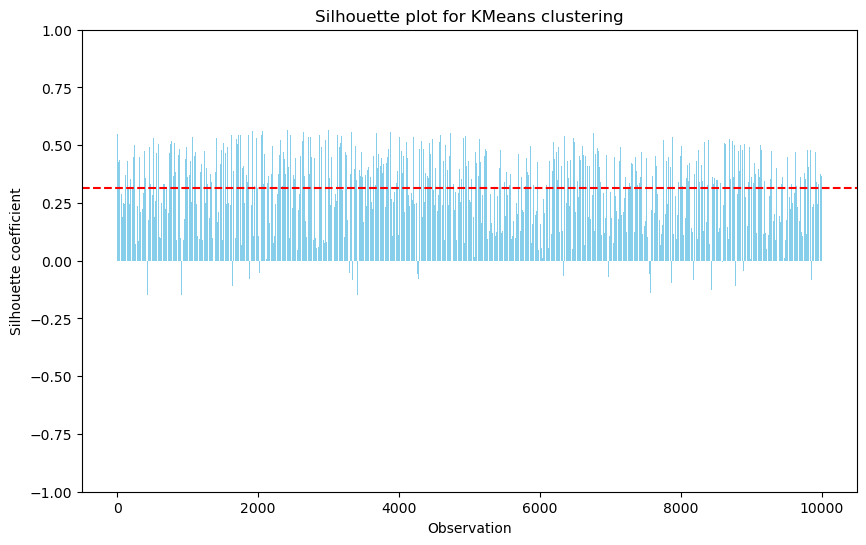

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_churn_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_churn_data, cluster_labels)
print("Average silhouette score:", silhouette_avg)

# Calculate silhouette scores for each sample
silhouette_values = silhouette_samples(scaled_churn_data, cluster_labels)

# Create a bar chart showing silhouette scores for each individual observation
plt.figure(figsize=(10, 6))
plt.bar(range(len(silhouette_values)), silhouette_values, color='skyblue')
plt.axhline(y=silhouette_avg, color="red", linestyle="--")
plt.title("Silhouette plot for KMeans clustering")
plt.xlabel("Observation")
plt.ylabel("Silhouette coefficient")
plt.ylim(-1, 1)
plt.show()


In [9]:
#Save the DataFrame to a CSV file
scaled_churn_data_df.to_csv('/Users/jasminemoniquecooper/Downloads/scaled_churn_data.csv', index=False)

print("CSV file saved successfully!")

CSV file saved successfully!
